In [1]:
import pandas as pd
import nltk
import re
import numpy as np
import itertools
import string
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
stopwords = set(stopwords.words('english'))

In [2]:
# generate confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
# clean text and remove stopwords
def cleantext(text):
    tx = re.sub(r"http(\S)+",' ',text) 
    tx = tx.replace('&amp',' ')
    tx = tx.translate(str.maketrans('', '', string.punctuation))
    tx = re.sub(r"[^0-9a-zA-Z]+",' ',tx)
    tx = tx.lower().split()
    tx = [x.strip() for x in tx if not x.isdigit()]
    tx = [w for w in tx if not w in stopwords and len(w) > 1]
    tx = " ".join(tx)
    return tx

In [4]:
train = pd.read_csv('./dataset/Constraint_English_Train - Sheet1.csv')
val = pd.read_csv('./dataset/Constraint_English_Val - Sheet1.csv')
test = pd.read_csv('./dataset/english_test_with_labels - Sheet1.csv')

In [5]:
train['tweet'] = train['tweet'].map(lambda x: cleantext(x))
val['tweet'] = val['tweet'].map(lambda x: cleantext(x))
test['tweet'] = test['tweet'].map(lambda x: cleantext(x))

In [6]:
# convert real -> 1 and fake -> 0
y_train = (train['label'] == 'real').astype(int)
y_val = (val['label'] == 'real').astype(int)
y_test = (test['label'] == 'real').astype(int)

In [7]:
def print_metrices(pred, true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ", accuracy_score(true, pred))
    print("Precison : ", precision_score(true, pred, average = 'weighted'))
    print("Recall : ", recall_score(true, pred, average = 'weighted'))
    print("F1 : ", f1_score(true, pred, average = 'weighted'))
    
    

In [8]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(train['tweet'])
X_val = vectorizer.transform(val['tweet'])
X_test = vectorizer.transform(test['tweet'])

### Logistic Regression

In [9]:
lg = LogisticRegression()     
lg = lg.fit(X_train, y_train)
y_pred_lg = lg.predict(X_val)

[[ 933   87]
 [  95 1025]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1020
           1       0.92      0.92      0.92      1120

    accuracy                           0.91      2140
   macro avg       0.91      0.91      0.91      2140
weighted avg       0.92      0.91      0.91      2140

Accuracy :  0.9149532710280374
Precison :  0.9150062618365978
Recall :  0.9149532710280374
F1 :  0.9149669644277795


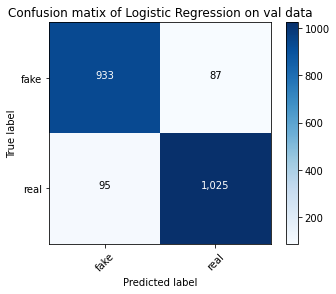

In [10]:
print_metrices(y_pred_lg, y_val)
plot_confusion_matrix(
    confusion_matrix(y_val, y_pred_lg),
    target_names=['fake','real'], 
    normalize = False,
    title = 'Confusion matix of Logistic Regression on val data')

### Support Vector Machine

In [11]:
svc = LinearSVC()     
svc = svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_val)

[[ 946   74]
 [  72 1048]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1020
           1       0.93      0.94      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140

Accuracy :  0.9317757009345794
Precison :  0.9317712399426807
Recall :  0.9317757009345794
F1 :  0.9317726549376449


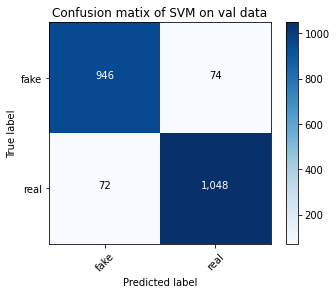

In [12]:
print_metrices(y_pred_svc, y_val)
plot_confusion_matrix(
    confusion_matrix(y_val, y_pred_svc),
    target_names=['fake','real'], 
    normalize = False,
    title = 'Confusion matix of SVM on val data')

### Decision Tree Classifier

In [13]:
dtc = tree.DecisionTreeClassifier()     
dtc = dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_val)

[[833 187]
 [161 959]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1020
           1       0.84      0.86      0.85      1120

    accuracy                           0.84      2140
   macro avg       0.84      0.84      0.84      2140
weighted avg       0.84      0.84      0.84      2140

Accuracy :  0.8373831775700935
Precison :  0.8373978108838315
Recall :  0.8373831775700935
F1 :  0.8372664455524955


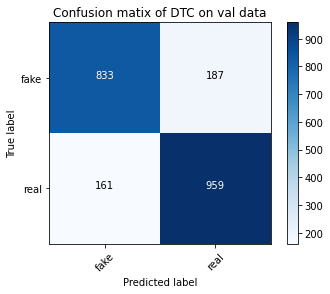

In [14]:
print_metrices(y_pred_dtc, y_val)
plot_confusion_matrix(
    confusion_matrix(y_val, y_pred_dtc),
    target_names=['fake','real'], 
    normalize = False,
    title = 'Confusion matix of DTC on val data')

### Gradient Boosting

In [15]:
gbc = GradientBoostingClassifier()     
gbc = gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_val)

[[919 101]
 [201 919]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1020
           1       0.90      0.82      0.86      1120

    accuracy                           0.86      2140
   macro avg       0.86      0.86      0.86      2140
weighted avg       0.86      0.86      0.86      2140

Accuracy :  0.8588785046728972
Precison :  0.8626376017696799
Recall :  0.8588785046728972
F1 :  0.8588785046728972


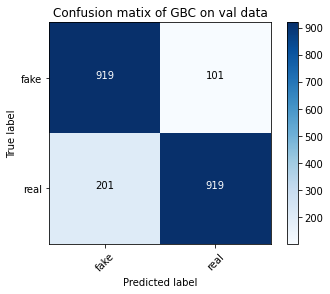

In [16]:
print_metrices(y_pred_gbc, y_val)
plot_confusion_matrix(
    confusion_matrix(y_val, y_pred_gbc),
    target_names=['fake','real'], 
    normalize = False,
    title = 'Confusion matix of GBC on val data')

### Support Vector Machine on test data

In [17]:
y_pred_svc_test = svc.predict(X_test)

[[ 959   61]
 [  75 1045]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1020
           1       0.94      0.93      0.94      1120

    accuracy                           0.94      2140
   macro avg       0.94      0.94      0.94      2140
weighted avg       0.94      0.94      0.94      2140

Accuracy :  0.9364485981308411
Precison :  0.9365622999948973
Recall :  0.9364485981308411
F1 :  0.9364653331426321


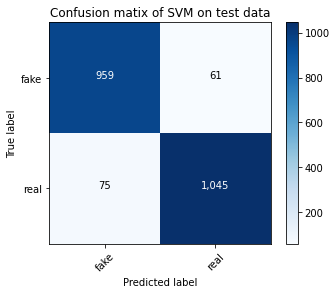

In [18]:
print_metrices(y_pred_svc_test, y_test)
plot_confusion_matrix(
    confusion_matrix(y_test, y_pred_svc_test),
    target_names=['fake','real'], 
    normalize = False,
    title = 'Confusion matix of SVM on test data')